In [97]:
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.ML.Descriptors.Descriptors import DescriptorCalculator
import numpy as np
import pandas as pd
from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator as Calculator

In [12]:
smi_file = "../data/derived/compounds_desalt.smi"

In [13]:
smiles = []
ind_names = []
smiles_dict = {}
with open(smi_file, 'r') as iFile:
    for i, s in enumerate(iFile):
        S = s.strip().split()
        smiles.append([S[0], i])
        ind_names.append(S[1])
        smiles_dict[S[1]] = S[0]

In [14]:
print(len(smiles_dict), len(smiles))

101018 101018


In [102]:
all_mols = []
for i in tqdm(list(smiles_dict)):
    m = Chem.MolFromSmiles(smiles_dict[i])
    m.SetProp("_Name",i)
    all_mols.append(m)

100%|██████████| 101018/101018 [00:12<00:00, 8141.67it/s]


# Trials

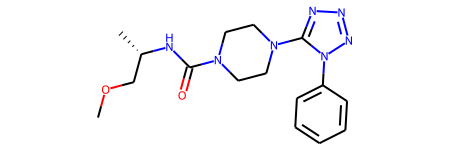

In [46]:
# m = Chem.MolFromSmiles('C1OCCC1c1c(Br)nc(O)cc1CC(=O)OCc1cnoc1')
m

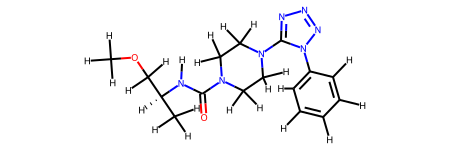

In [34]:
m2=Chem.AddHs(m)
m2

In [36]:
AllChem.EmbedMolecule(m2)
AllChem.MMFFOptimizeMolecule(m2)

0

1

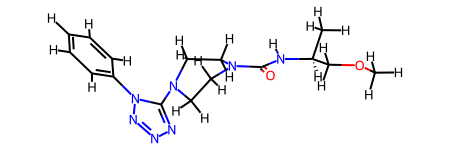

In [38]:
m2

In [40]:
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

In [94]:
chosen_descriptors = [
    'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v',
    'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2',
    'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8',
    'EState_VSA9', 'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3',
    'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Ipc', 'Kappa1', 'Kappa2',
    'Kappa3', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 
    'MaxPartialCharge', 'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex',
    'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles',
    'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles',
    'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons',
    'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings',
    'NumValenceElectrons', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 
    'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7',
    'PEOE_VSA8', 'PEOE_VSA9', 'RingCount', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3',
    'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 
    'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 
    'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'VSA_EState1',
    'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6',
    'VSA_EState7', 'VSA_EState8', 'VSA_EState9', 'fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 
    'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O',
    'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O',
    'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH', 'fr_aldehyde',
    'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_amidine',
    'fr_aniline', 'fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzene',
    'fr_benzodiazepine', 'fr_bicyclic', 'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide',
    'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzine', 'fr_hdrzone',
    'fr_imidazole', 'fr_imide', 'fr_isocyan', 'fr_isothiocyan', 'fr_ketone', 'fr_ketone_Topliss',
    'fr_lactam', 'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile', 'fr_nitro',
    'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_oxazole', 'fr_oxime',
    'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_phos_acid',
    'fr_phos_ester', 'fr_piperdine', 'fr_piperzine', 'fr_priamide', 'fr_prisulfonamd',
    'fr_pyridine', 'fr_quatN', 'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene',
 'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane', 'fr_urea', 'qed'
]


In [76]:
# Descriptors.MinAbsPartialCharge(m)
# rdMolDescriptors.CalcFractionCSP3(all_mols[3])
# Descriptors.rdMolDescriptors.CalcCrippenDescriptors(all_mols[3])
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
# create molecular descriptor calculator
mol_descriptor_calculator = MolecularDescriptorCalculator(chosen_descriptors)


In [84]:
smi_based = np.array(list(mol_descriptor_calculator.CalcDescriptors(m)))

ff_based = np.array(list(mol_descriptor_calculator.CalcDescriptors(m2)))

In [92]:
mask = np.abs((smi_based - ff_based)/(ff_based+0.01)) > 0.2

In [93]:
np.array(chosen_descriptors)[mask]

array(['BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n',
       'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v',
       'EState_VSA1', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4',
       'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'Ipc',
       'Kappa1', 'MinAbsEStateIndex', 'MinEStateIndex',
       'NumRotatableBonds', 'PEOE_VSA11', 'PEOE_VSA9', 'SMR_VSA1',
       'SlogP_VSA5', 'SlogP_VSA7', 'VSA_EState1', 'VSA_EState2',
       'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6',
       'VSA_EState8', 'VSA_EState9'], dtype='<U24')

# Compute descriptors

## Generate 3D

In [120]:
# TODO it later 
all_mols_modif = []
for m in tqdm(all_mols):
    m2 = Chem.AddHs(m)
    AllChem.EmbedMolecule(m2)
    # AllChem.MMFFOptimizeMolecule(m2)
    AllChem.MMFFOptimizeMoleculeConfs(m2, numThreads=0)
    all_mols_modif.append(m2)

  1%|          | 557/101018 [00:55<2:46:10, 10.08it/s]


KeyboardInterrupt: 

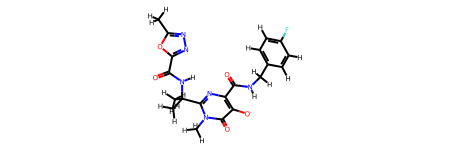

In [119]:
all_mols_modif[50]

## Calc descr

In [121]:
all_des = []
for m in tqdm(all_mols):
    d = list(mol_descriptor_calculator.CalcDescriptors(m))
    all_des.append(d)
all_des = np.array(all_des)

100%|██████████| 101018/101018 [11:01<00:00, 152.66it/s]


In [126]:
df_des = pd.DataFrame(all_des)
df_des.columns = chosen_descriptors

In [129]:
df_des.shape

(101018, 200)

In [136]:
# ind_names

In [137]:
df_des.dropna(axis=1, inplace=True)
df_des['Id'] = ind_names

In [140]:
df_des.to_csv('../data/derived/rdkit_1d_des.csv', index=False)
